In [10]:
from billiards import Billiards

In [11]:
def square(t):
    if t < 0.25:
        return np.array([4*t - .5,-.5])
    if t <= 0.5:
        return np.array([.5,4*(t-.25) - .5])
    if t <= 0.75:
        return np.array([.5-(4*(t-.5)),.5])
    if t <= 1: 
        return np.array([-.5,.5-(4*(t-.75))])
    else:
        return np.array([-.5,-.5])

In [12]:
x = np.array([.1, 0])
v = np.array([.1,-.2])
N = 500

ball = Billiards(square, x, v, poincare = True)
for i in range(N):
    ball.bounce()

Path figure saved as self.path_fig


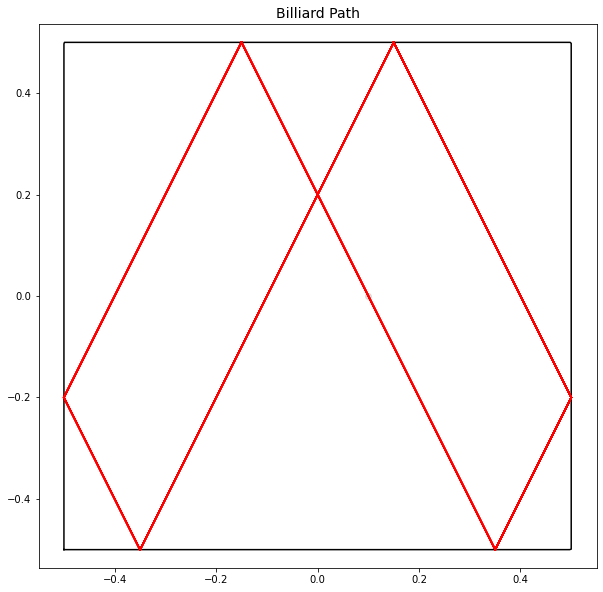

In [13]:
ball.plot_path()

Poincare section figure saved as self.poincare_fig


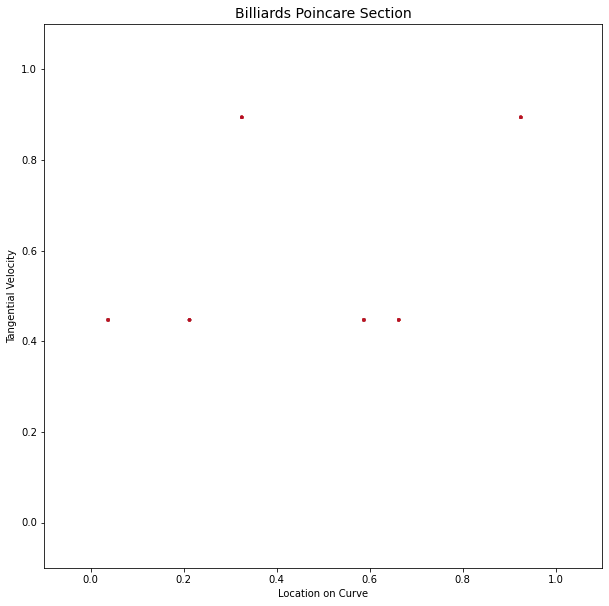

In [14]:
ball.plot_poincare()